In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
joke_dt =pd.read_csv("jester_ratings.csv")
joke_dt.head(5)

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [3]:
joke_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


In [4]:
joke_dt.describe()

,userId,jokeId,rating
count,1.761439e+06,1.761439e+06,1.761439e+06
mean,3.272322e+04,7.071133e+01,1.618602e+00
std,1.828011e+04,4.600790e+01,5.302608e+00
min,1.000000e+00,5.000000e+00,-1.000000e+01
25%,1.720200e+04,2.100000e+01,-2.031000e+00
50%,3.480800e+04,6.900000e+01,2.219000e+00
75%,4.730600e+04,1.120000e+02,5.719000e+00
max,6.397800e+04,1.500000e+02,1.000000e+01


In [5]:
joke_dt.isna().sum()

userId    0
jokeId    0
rating    0
dtype: int64

<AxesSubplot:xlabel='jokeId'>

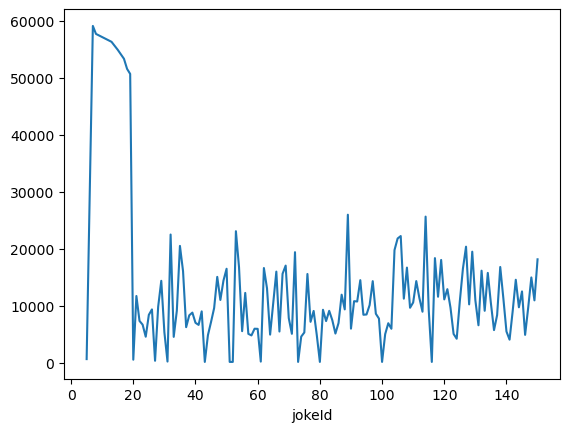

In [6]:
data_plt=joke_dt.groupby('jokeId').size()
data_plt.plot()

In [7]:
joke_dt.isnull().any()

userId    False
jokeId    False
rating    False
dtype: bool

In [8]:
joke_dt['userId'].unique()

array([    1,     2,     3, ..., 63976, 63977, 63978], dtype=int64)

In [13]:
joke_dt['jokeId'].value_counts()

7      59122
8      57720
13     56333
15     54932
16     54150
       ...  
80       167
73       167
51       166
116      166
43       166
Name: jokeId, Length: 140, dtype: int64

# Visulaization

<AxesSubplot:ylabel='Frequency'>

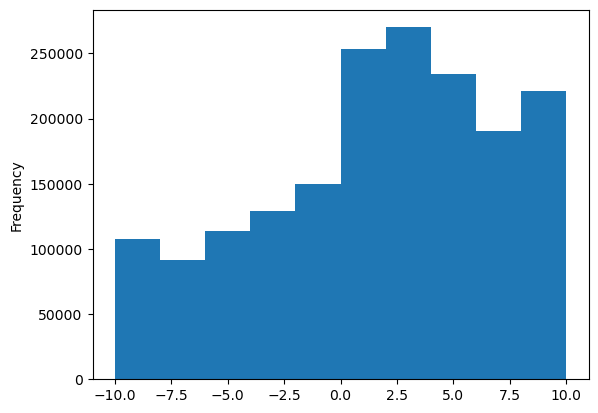

In [14]:
joke_dt.rating.plot(kind='hist')

In [18]:
joke_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


<AxesSubplot:ylabel='Density'>

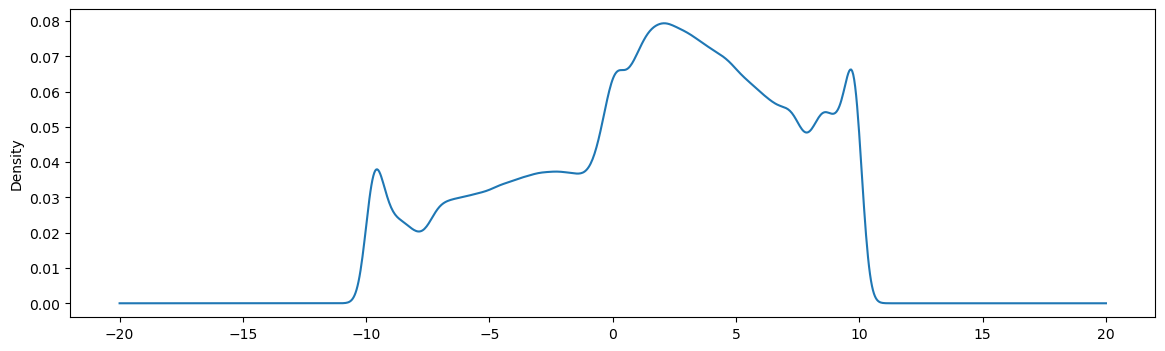

In [41]:
joke_dt['rating'].plot(kind='density',figsize=(14,4))

In [42]:
from sklearn.decomposition import PCA
pca =PCA()
X_new = pca.fit_transform(X)
X_new.shape

(1761439, 2)

# Model Building

In [25]:
from sklearn.model_selection import train_test_split

In [43]:
X = joke_dt.iloc[:, :-1]
Y = joke_dt.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(X_new, Y, train_size = 0.67, random_state =True)

In [44]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train =std_scaler.fit_transform(X_train)
X_test =std_scaler.fit_transform(X_test)

# XGBoost

In [50]:
from xgboost import XGBRFRegressor
xgb_clf = XGBRFRegressor()
xgb_clf.fit(X_train, y_train)
predict_test = xgb_clf.predict(X_test)
test_score= mean_absolute_error(predict_test, y_test)
print("Test score:", np.round(test_score,2))

Test score: 4.16


# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs =-1)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)

In [46]:
print("Intercept is "+str(model.intercept_))
print("Coeffiecient is "+str(model.coef_))

Intercept is 1.61763403306659
Coeffiecient is [-0.12510437  0.9680873 ]


In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [48]:
mean_absolute_error(y_pred,y_test)

4.27077240374303

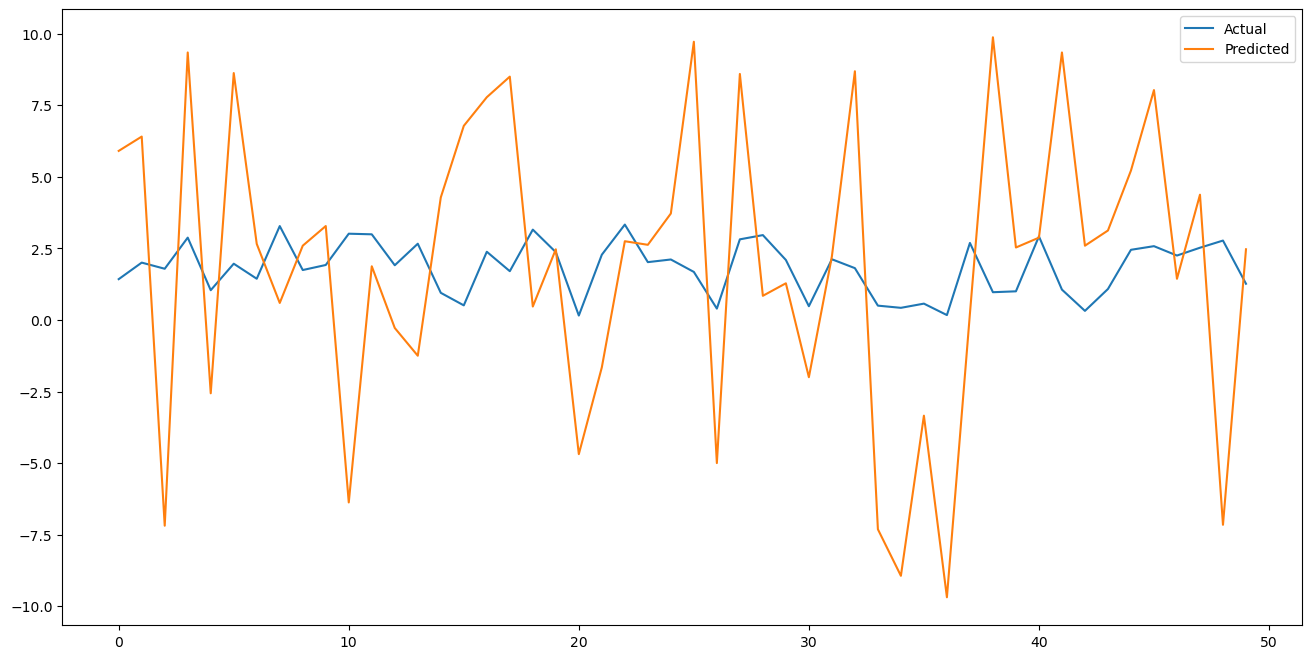

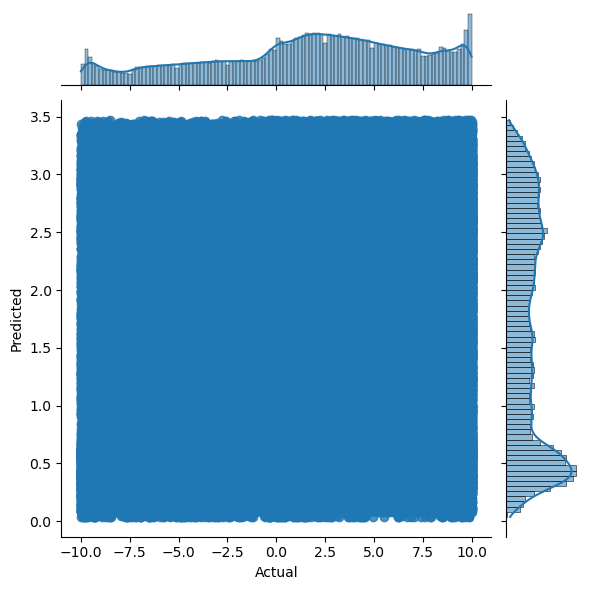

In [36]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")